# Introduction to Regression with statsmodels in Python

### Libraries and datasets

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

taiwan_real_estate = pd.read_csv('datasets/taiwan_real_estate2.csv')

## 1. Simple Linear Regression Modeling

### Visualizing two numeric variables
Instructions:
<ul>
<li>Import the seaborn package, aliased as sns.</li>
<li>Using taiwan_real_estate, draw a scatter plot of "price_twd_msq" (y-axis) versus "n_convenience" (x-axis).</li>
<li>Draw a trend line calculated using linear regression. Omit the confidence interval ribbon. Note: The scatter_kws argument, pre-filled in the exercise, makes the data points 50% transparent.</li>
</ul>

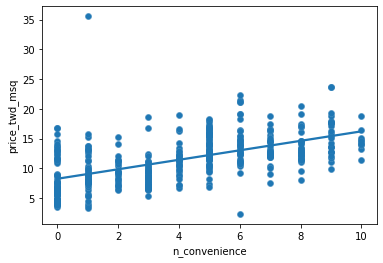

In [3]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

## 2. Predictions and model objects

## 3. Assessing model fit

## 4. Simple Logistic Regression Modeling